In [7]:
import torch
a = torch.randn(5,10)
b = torch.randn(5,10)
torch.cuda.


AttributeError: module 'torch' has no attribute 'cuda_version_1'

Read training data

In [1]:
import pandas as pd
df = pd.read_csv("data/train.csv")

Show Image in data

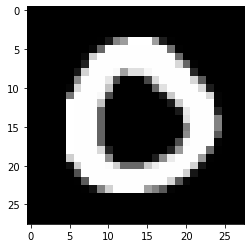

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.imshow(df.iloc[4].values[1:].reshape((28,28)), cmap="gray")


Split in sample train and test data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


y = pd.get_dummies(df["label"]).values
X = df.drop("label", axis=1).values / 255
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state= 10)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(784),
    Dense(392, activation= "relu"),
    Dense(392, activation= "relu"),
    Dense(392, activation= "relu"),
    Dense(392, activation= "relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 20)

Epoch 1/20
222/880 [======>.......................] - ETA: 3s - loss: 1.6793 - accuracy: 0.5762

KeyboardInterrupt: 

Predicting out of sample test data

In [8]:
from numpy import argmax

i = 5
oos_test = pd.read_csv("data/test.csv")
nl_test = oos_test.values / 255
labels = argmax(model.predict(nl_test), axis=1)

In [9]:
import numpy as np

out = pd.DataFrame(data={
    "ImageId":np.arange(1, 28001),
    "Label": labels
}).set_index("ImageId")

out.to_csv("ffw_nn_result.csv")

NameError: name 'labels' is not defined

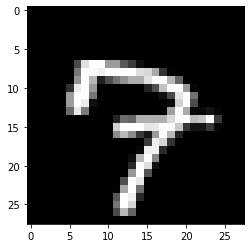

In [10]:
plt.imshow(oos_test.iloc[i].values.reshape((28,28)), cmap="gray")

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

X_train_2d = X_train.reshape(X_train.shape[0],28,28,1) 
X_test_2d = X_test.reshape(X_test.shape[0],28,28,1) 


cnn_model = Sequential()
cnn_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape = (28,28,1)))
cnn_model.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
X_train_2d = X_train.reshape(X_train.shape[0],28,28,1) 
X_test_2d.shape

(13860, 28, 28, 1)

In [6]:
cnn_model.fit(X_train_2d, y_train, validation_data=(X_test_2d, y_test), epochs=5)

Epoch 1/5
880/880 [==============================] - 27s 30ms/step - loss: 0.1837 - accuracy: 0.9454 - val_loss: 0.0794 - val_accuracy: 0.9747
Epoch 2/5
880/880 [==============================] - 27s 31ms/step - loss: 0.0620 - accuracy: 0.9813 - val_loss: 0.0619 - val_accuracy: 0.9809
Epoch 3/5
880/880 [==============================] - 27s 30ms/step - loss: 0.0397 - accuracy: 0.9886 - val_loss: 0.0706 - val_accuracy: 0.9782
Epoch 4/5
880/880 [==============================] - 27s 30ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0615 - val_accuracy: 0.9807
Epoch 5/5
880/880 [==============================] - 27s 31ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0640 - val_accuracy: 0.9812


In [8]:
from numpy import argmax

oos_test = pd.read_csv("data/test.csv")
nl_test = oos_test.values / 255
nl_test_2d = nl_test.reshape(nl_test.shape[0], 28, 28, 1)
labels = argmax(cnn_model.predict(nl_test_2d), axis=1)

In [10]:
import numpy as np

out = pd.DataFrame(data={
    "ImageId":np.arange(1, 28001),
    "Label": labels
}).set_index("ImageId")

out.to_csv("cnn_result.csv")